# EDA

There are 7613 Tweets.

There are 222 unique `keyword` values and 3342 unique `location` values.

I think that `keyword` could be used to predict the target together with `text`.

In [1]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_ds(path: Path, filename: str) -> pd.DataFrame:
    """Read the dataset csv file as a pandas dataframe"""
    path_csv = Path(path, filename)
    return pd.read_csv(path_csv)


dataset_path = Path(os.getcwd(), "data")
filename = "train.csv"

df_train_val = load_ds(dataset_path, filename)

In [3]:
df_train_val.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
print(f"percent NaN keyword: {df_train_val.keyword.isna().sum() / df_train_val.shape[0]:.3f}")
print(f"percent NaN location: {df_train_val.location.isna().sum() / df_train_val.shape[0]:.3f}")

percent NaN keyword: 0.008
percent NaN location: 0.333


In [5]:
df_train_val.shape[0]

7613

# Keyword

In [6]:
len(df_train_val.keyword.unique())

222

In [7]:
df_train_val.keyword.unique()[:50]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide'], dtype=object)

In [8]:
keyword_count = (
    df_train_val
    .groupby(["keyword", "target"], dropna=False)[["keyword", "target"]]
    .value_counts(dropna=False)
    .reset_index()
    .sort_values(by=["count"], ascending=False)
    .reset_index(drop=True)
)

keyword_count.head(10)

,keyword,target,count
0,NaN,1,42
1,body%20bags,0,40
2,derailment,1,39
3,wreckage,1,39
4,outbreak,1,39
5,typhoon,1,37
6,armageddon,0,37
7,oil%20spill,1,37
8,harm,0,37
9,debris,1,37


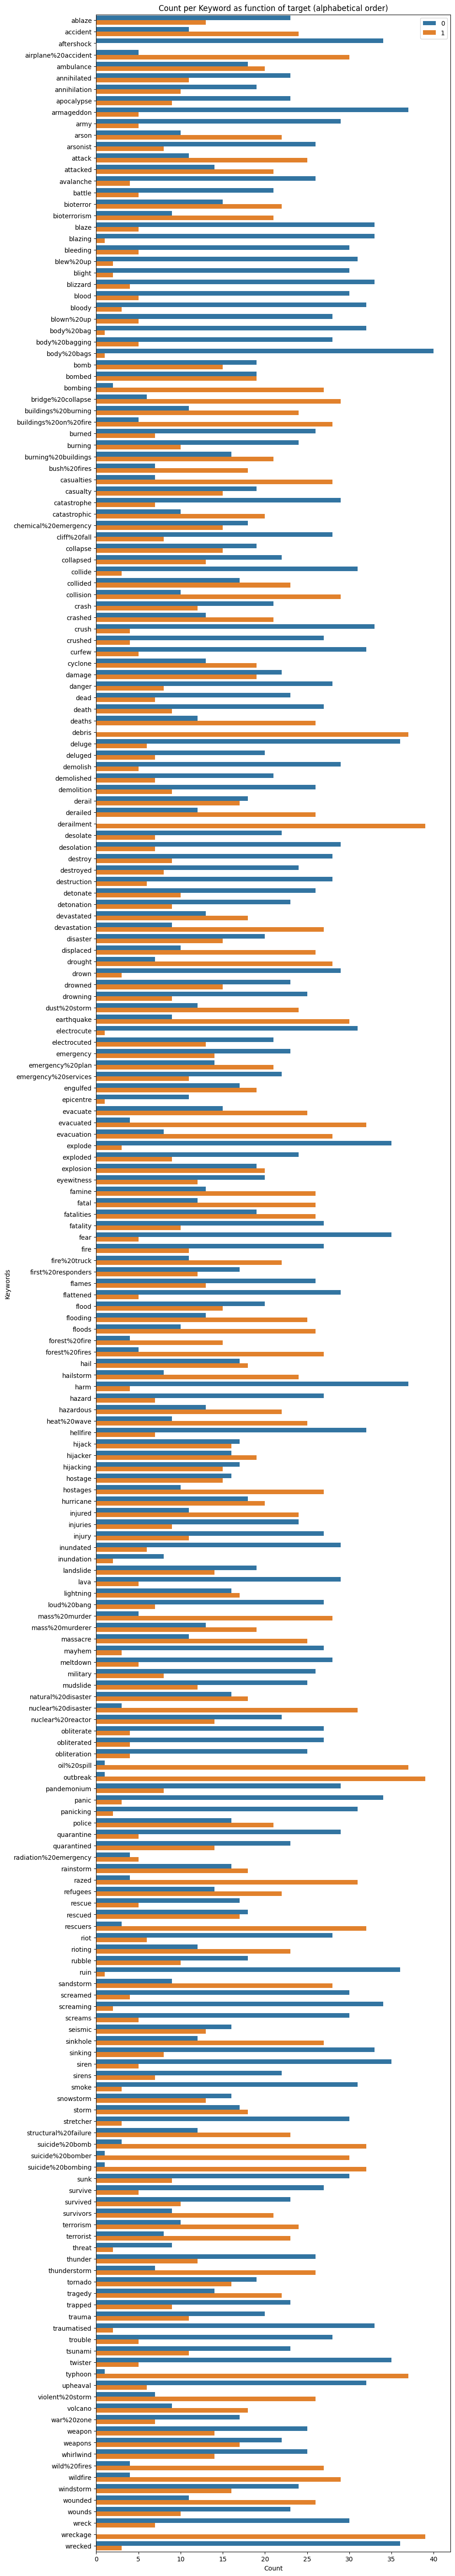

In [9]:
fig = plt.figure(figsize=(10, 72))
sns.countplot(
    y=df_train_val['keyword'],
    hue=df_train_val['target']
)
plt.ylabel("Keywords")
plt.xlabel("Count")
plt.legend(loc=1)
plt.title('Count per Keyword as function of target (alphabetical order)')
plt.show()

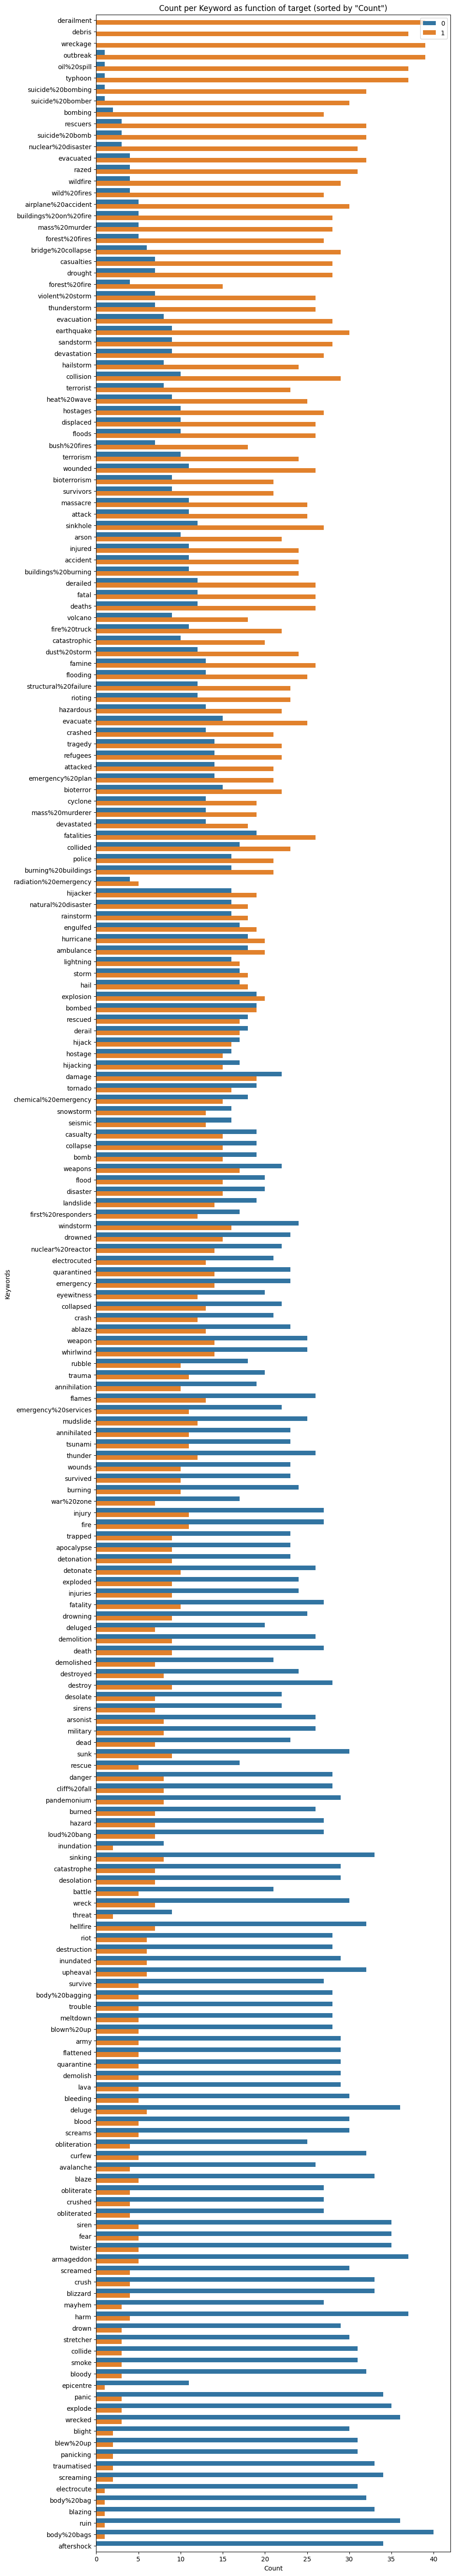

In [10]:
df_train_val['target_mean'] = df_train_val.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(10, 72))
sns.countplot(
    y=df_train_val.sort_values(by='target_mean', ascending=False)['keyword'],
    hue=df_train_val.sort_values(by='target_mean', ascending=False)['target']
)
plt.ylabel("Keywords")
plt.xlabel("Count")
plt.legend(loc=1)
plt.title('Count per Keyword as function of target (sorted by "Count")')
plt.show()

df_train_val.drop(columns=['target_mean'], inplace=True)

# Location

In [11]:
len(df_train_val.location.unique())

3342

In [12]:
df_train_val.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [13]:
location_count = (
    df_train_val
    .groupby(["location", "target"], dropna=False)[["location", "target"]]
    .value_counts(dropna=False)
    .reset_index()
    .sort_values(by=["count"], ascending=False)
    .reset_index(drop=True)
)

location_count.head(10)

,location,target,count
0,NaN,0,1458
1,NaN,1,1075
2,USA,1,67
3,New York,0,55
4,USA,0,37
5,London,0,29
6,United States,1,27
7,United States,0,23
8,Nigeria,1,22
9,India,1,20


In [14]:
location_count.shape

(3657, 3)